In [47]:
import pandas as pd
import numpy as np
import scipy.stats as sp
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

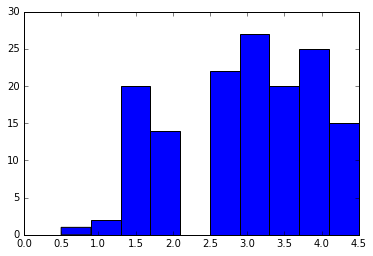

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

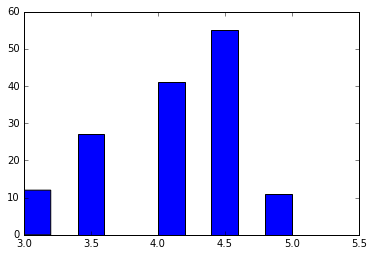

In [36]:
plt.hist(movies["Fandango_Stars"])

In [37]:
movies["Metacritic_norm_round"].mean()

2.9726027397260273

In [38]:
movies["Fandango_Stars"].mean()

4.0890410958904111

In [39]:
movies["Metacritic_norm_round"].median()

3.0

In [40]:
movies["Fandango_Stars"].median()

4.0

In [41]:
np.std(movies["Metacritic_norm_round"])

0.98756102970386306

In [42]:
np.std(movies["Fandango_Stars"])

0.53853216126995307

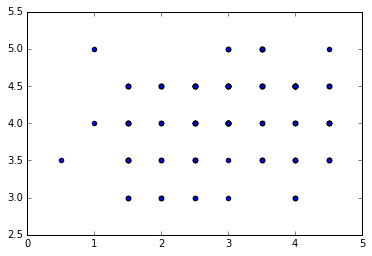

In [43]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [44]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [45]:
movies.sort_values(by="fm_diff",ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [51]:
r_value, p_value = sp.pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
r_value

0.17844919073895918

In [53]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [54]:
pred = 3 * slope + intercept

pred

4.0917071528212041

In [59]:
pred_1 = 1 * slope + intercept

pred_1

3.897084996873347

In [60]:
pred_5 = 5 * slope + intercept

pred_5

4.2863293087690604

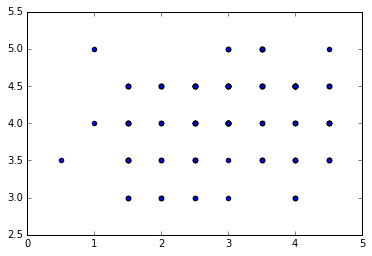

In [58]:
plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1.0,5.0],[pred])